# Learn how to get a light yield

Tunnell, Feburary 2016

This tutorial describes how to use analyze the AmBe data to fit the inelastic line.

The following line just runs our standard code for every analysis.  You can change 'run' to 'load' to see what is in there.

In [59]:
%matplotlib inline
%run boiler_plate.py
import hax

In [60]:
## Specify your own data location
hax.config.CONFIG['main_data_paths'] = ['/tmp/data/good/']
hax.runs.update_datasets()

## Load data

Grab the AmBe datasets then just use the first one:

In [64]:
datasets_ambe = hax.runs.DATASETS.query('source == "AmBe" & category == "standard" & tpc == "xenon100" & location != ""')['name'].values

Inspect this dataset

In [65]:
df = hax.minitrees.load(datasets_ambe)
df.head(5)

Found minitree at ./xe100_110210_1100_Basics.root
Found minitree at ./xe100_110210_1412_Basics.root
Found minitree at ./xe100_110211_0532_Basics.root
Created minitree Basics for dataset xe100_120404_0804


,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,largest_other_s1,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
0,0,4.822919,439.419690,1102101100,49639.042969,0,1297332001005216000,0,0,0.000000,0,0.000000,3.628556,0.215452,393.525543,0.593098,-12.639623,5.915094,-8.587554
1,1,NaN,NaN,1102101100,NaN,1,1297332001027482112,0,0,0.000000,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4.246333,488.037578,1102101100,123562.687500,2,1297332001054971904,0,0,300.855682,0,0.000000,5.172802,0.000000,370.854065,0.566815,0.560377,-7.783019,-21.376345
3,3,NaN,NaN,1102101100,NaN,3,1297332001141690880,0,0,534.971069,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,1102101100,NaN,4,1297332001147309056,0,0,237.557007,0,203.871292,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df['cs2_bottom'] = df['cs2'] * (1 - df['s2_area_fraction_top'])

## Cuts

Here are the cuts

In [67]:
def cut(df):
    cut_single_s1 = (df['largest_other_s1'] == 0)
    cut_single_s2 = (df['largest_other_s2'] < 100)
    cut_radius = (np.sqrt(df['x']**2 + df['y']**2) < 12)
    cut_z = (df['z'] < -5) & (df['z'] > -27)
    cut_fiducial = (cut_radius & cut_z)
    #df = df[cut_single_s1 & cut_single_s2 & cut_fiducial]
    return df[df['drift_time'] < 180000]
df = cut(df)

Inspect $(x,y)$

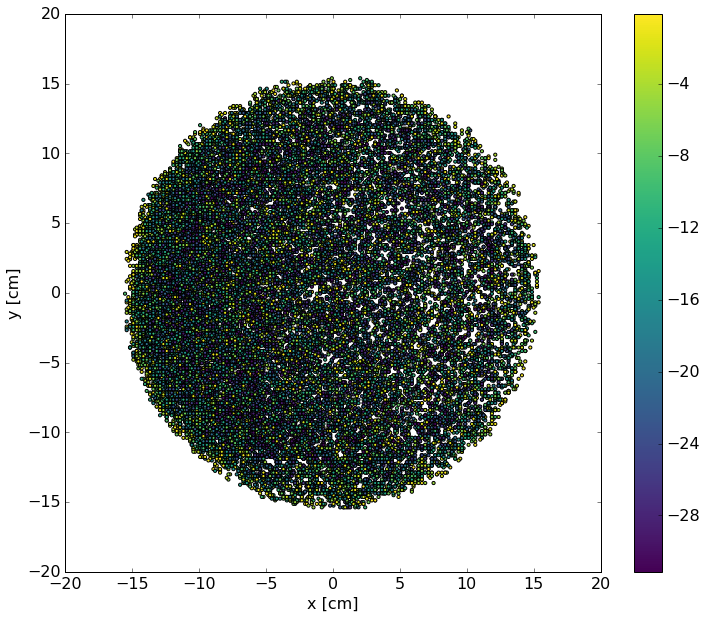

In [68]:
plt.scatter(df['x'],df['y'], c=df['z'], marker='o', s=10)
plt.colorbar()
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show()

Inspect $(r,z)$.

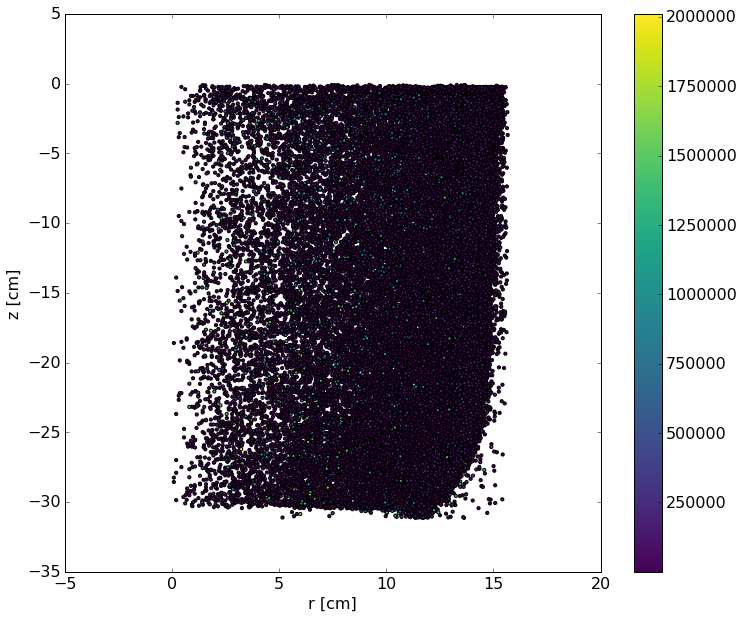

In [69]:
plt.scatter(np.sqrt(df['x']**2 + df['y']**2), df['z'], c=df['cs2'],
            marker='o', s=10)
plt.colorbar()
plt.xlabel('r [cm]')
plt.ylabel('z [cm]')

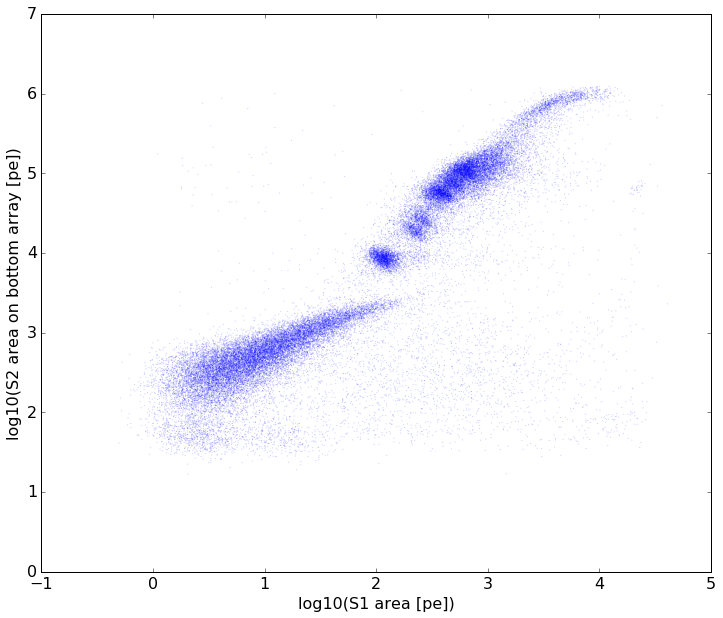

In [70]:
plt.scatter(np.log10(df['cs1']),
            np.log10(df['cs2'] * (1 - df['s2_area_fraction_top'])),
            marker='.',
            s=5,
            alpha=0.2,
            edgecolors='none')

plt.xlabel('log10(S1 area [pe])')
plt.ylabel('log10(S2 area on bottom array [pe])')


plt.show()

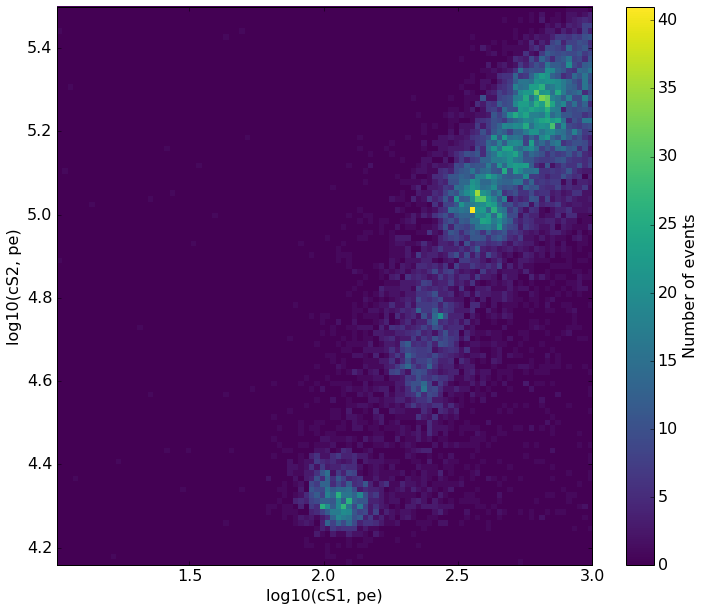

In [87]:
df_he = df[(df['cs2_bottom'] > 8000) & (df['cs2_bottom'] < 200e3) & (df['cs1'] < 1000) & (df['cs1'] > 1e1)]

# Make an S1 vs S2 histogram
plt.hist2d(np.log10(df_he['cs1']), np.log10(df_he['cs2']),
           bins=100, 
           #norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('log10(cS1, pe)')
plt.ylabel('log10(cS2, pe)')
plt.show()

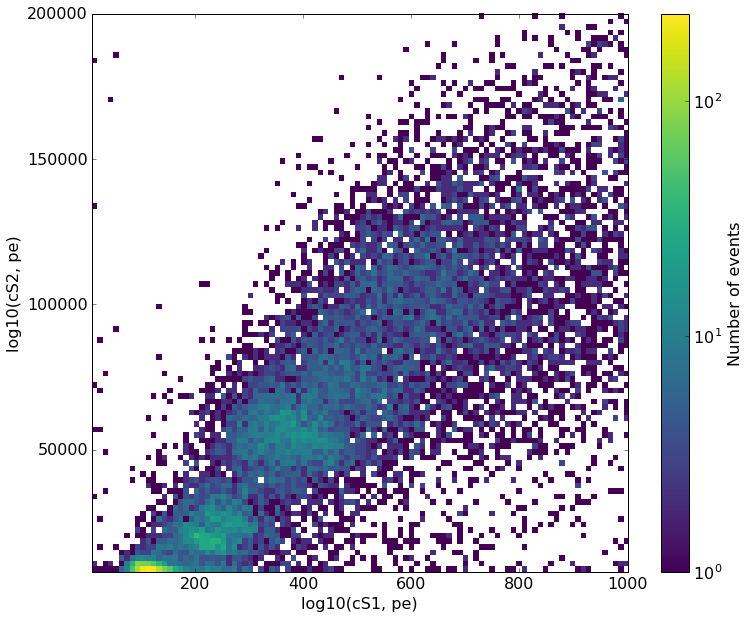

In [89]:
# Make an S1 vs S2 histogram
plt.hist2d(df_he['cs1'],
           (df_he['cs2'] * (1 - df_he['s2_area_fraction_top'])),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('log10(cS1, pe)')
plt.ylabel('log10(cS2, pe)')
plt.show()


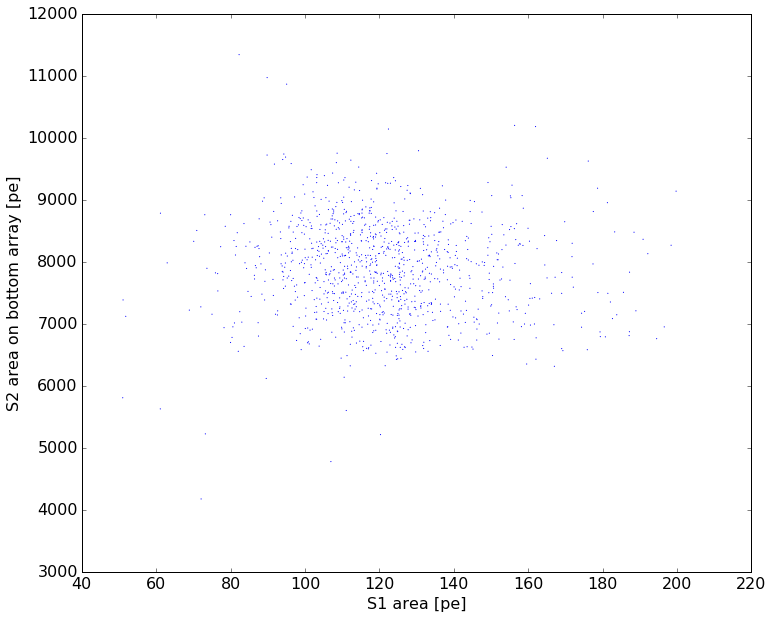

In [47]:
df_40kev = df[(df['cs1'] > 50) & (df['cs1'] < 200) & (df['cs2'] > 15000) & (df['cs2'] < 20000)]

plt.scatter(df_40kev['cs1'],
            df_40kev['cs2'] * (1 - df_40kev['s2_area_fraction_top']),
            marker='.',
            s=5,
            alpha=1.0,
            edgecolors='none')

plt.xlabel('S1 area [pe]')
plt.ylabel('S2 area on bottom array [pe]')

plt.show()


In [48]:
print('S1 (40 keV) pe:', df_40kev['cs1'].mean(), '+/-', df_40kev['cs1'].std())
print('S2 (40 keV) pe:', df_40kev['cs2'].mean(), '+/-', df_40kev['cs2'].std())

S1 (40 keV) pe: 121.14885964412466 +/- 21.895923700779765
S2 (40 keV) pe: 17703.84815681181 +/- 1385.5842568775965


In [49]:
print('S1 pe/keV:', df_40kev['cs1'].mean()/40)
print('S2 pe/keV:', df_40kev['cs2'].mean()/40)

S1 pe/keV: 3.0287214911031164
S2 pe/keV: 442.5962039202953
